# Q1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Q1_a

In [3]:
img1 = cv2.imread('Image1.jpeg')

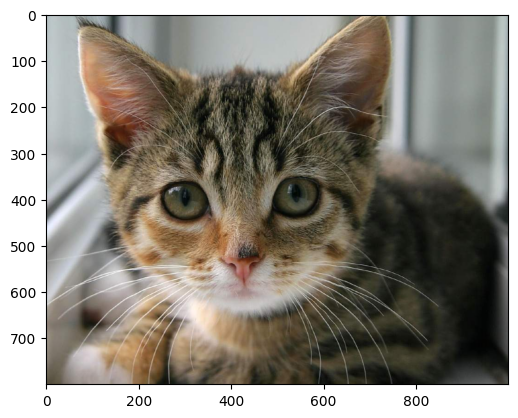

In [4]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

## Q1_b

In [5]:
print(f'''Channel : Red{img1[:, :, 2]}/n
      Channel : Green{img1[:, :, 1]}/n
      Channel : Blue{img1[:, :, 0]}/n''')

Channel : Red[[176 177 178 ... 172 167 164]
 [177 177 178 ... 172 167 164]
 [177 177 178 ... 171 167 164]
 ...
 [ 95  94  92 ...  79  83  86]
 [ 96  94  93 ...  79  83  86]
 [ 96  95  93 ...  79  83  86]]/n
      Channel : Green[[187 188 189 ... 184 179 176]
 [188 188 189 ... 184 179 176]
 [188 188 189 ... 183 179 176]
 ...
 [ 88  87  85 ...  81  85  88]
 [ 89  87  86 ...  81  85  88]
 [ 89  88  86 ...  81  85  88]]/n
      Channel : Blue[[189 190 191 ... 184 179 176]
 [190 190 191 ... 184 179 176]
 [190 190 191 ... 183 179 176]
 ...
 [ 72  71  69 ...  70  74  77]
 [ 73  71  70 ...  70  74  77]
 [ 73  72  70 ...  70  74  77]]/n


<function matplotlib.pyplot.show(close=None, block=None)>

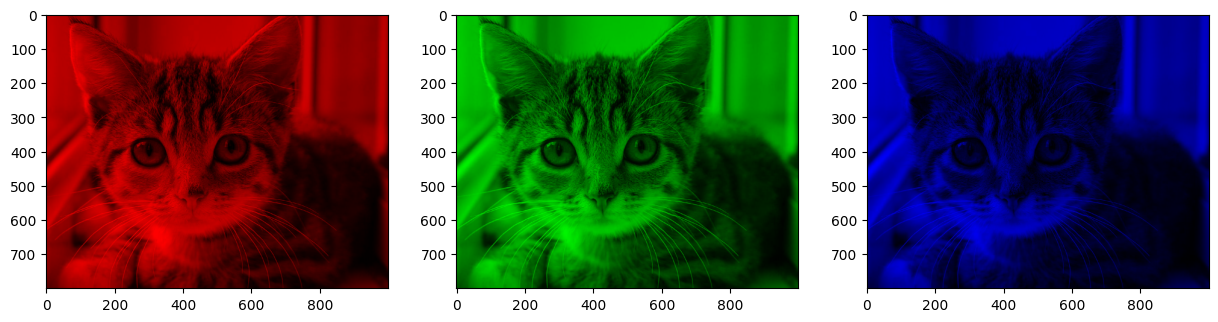

In [6]:
zeros = np.zeros(img1.shape[:2], dtype="uint8")
plt.figure(figsize=(15,9))

plt.subplot(1, 3, 1)

plt.imshow(cv2.merge([img1[:, :, 2], zeros, zeros]))
plt.subplot(1, 3, 2)
plt.imshow(cv2.merge([zeros,img1[:, :, 1], zeros]))

plt.subplot(1, 3, 3)
plt.imshow(cv2.merge([zeros, zeros, img1[:, :, 0]]))
plt.show

## Q1_c

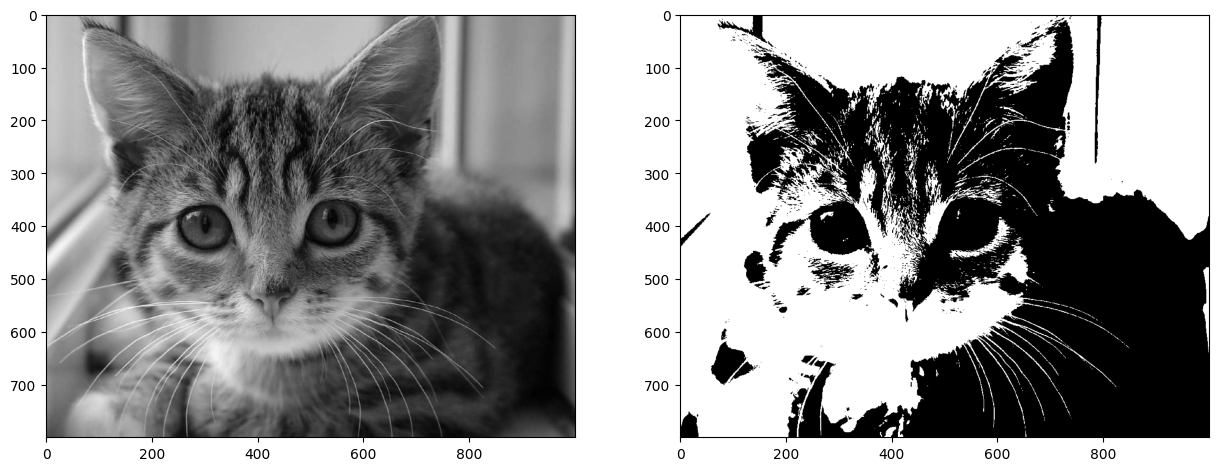

In [19]:
import numpy as np
from PIL import Image

def rgb_to_grayscale(image):
    img_array = np.array(image)
    
    grayscale = np.dot(img_array, [0.33, 0.34, 0.33])
    
    return grayscale.astype(np.uint8)

def grayscale_to_binary(image, threshold=100):
    binary = (image > threshold) * 255
    
    return binary.astype(np.uint8)

plt.figure(figsize=(15, 9))
grayscale_image = rgb_to_grayscale(img1)
plt.subplot(1, 2, 1)

plt.imshow(grayscale_image, cmap='gray')
binary_image = grayscale_to_binary(grayscale_image)
plt.subplot(1, 2, 2)

plt.imshow(binary_image, cmap='gray')

plt.show()

## Q1_d

In [256]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (30 * ((g-b)/df))
    elif mx == g:
        h = (30 * ((b-r)/df) + 60)
    elif mx == b:
        h = (30 * ((r-g)/df) + 120)
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*255
    v = mx*255
    return h, s, v


image_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

height, width, _ = image_rgb.shape

hsv_image = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        r, g, b = image_rgb[i, j]
        h, s, v = rgb_to_hsv(r, g, b)
        hsv_image[i, j] = [h, s, v]



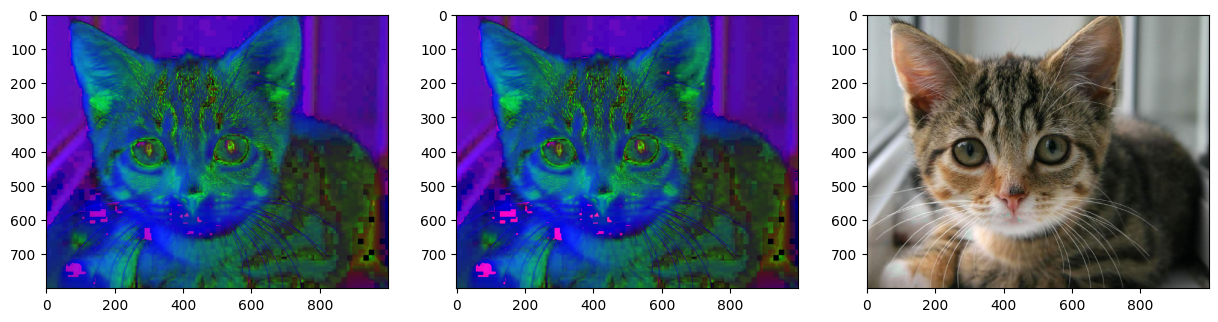

In [262]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2HSV))
plt.subplot(1, 3, 2)

plt.imshow(hsv_image)
plt.subplot(1, 3, 3)

plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))


## Q1_e

we know in HSV, H is the value for color and values about 0 - 10 are red. So, to extract red from other colors in HSV, we must get range of 0 to 20 in h value and also, we ignore 0-50 in s and v to prevent detecting black.

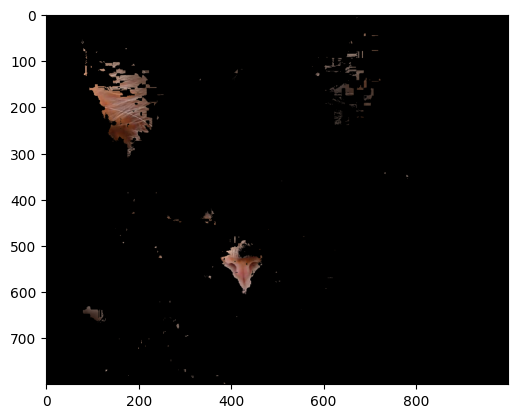

In [272]:
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255]) 

mask = cv2.inRange(hsv_image, lower_red, upper_red)

red_extracted = cv2.bitwise_and(img1, img1, mask=mask)

plt.imshow(cv2.cvtColor(red_extracted, cv2.COLOR_BGR2RGB))


# Q2

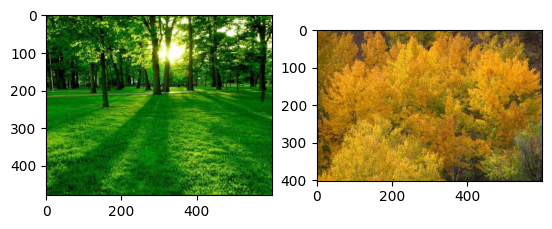

In [274]:
img2_1 = cv2.imread('Image2.1.jpg')
img2_2 = cv2.imread('Image2.2.jpg')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2_1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_2, cv2.COLOR_BGR2RGB))


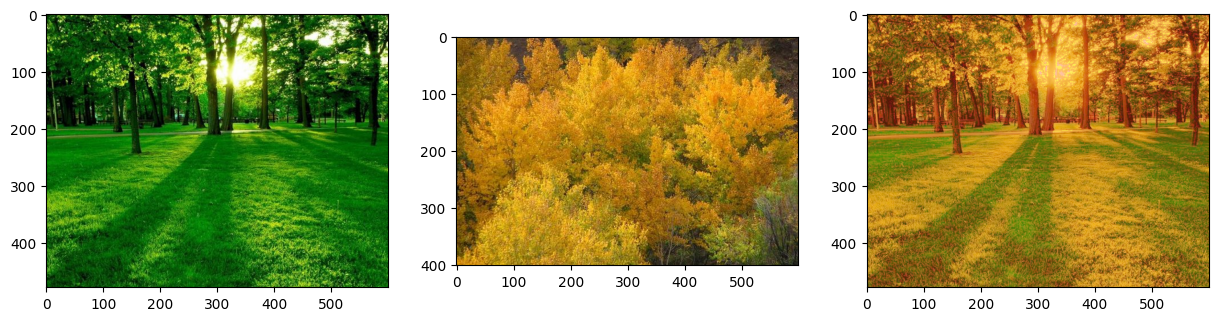

In [308]:
from skimage import data 
from skimage import exposure 
from skimage.exposure import match_histograms 

matched = exposure.match_histograms(img2_1, img2_2, channel_axis=-1)

plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img2_1, cv2.COLOR_BGR2RGB)) 
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2_2, cv2.COLOR_BGR2RGB)) 
plt.subplot(1, 3, 3)
plt.imshow(cv2.merge([matched.astype(int)[:, :, 2], matched.astype(int)[:, :, 1], matched.astype(int)[:, :, 0]])) 
  
plt.show() 

In [282]:
img1.shape

(800, 1000, 3)

# Q3

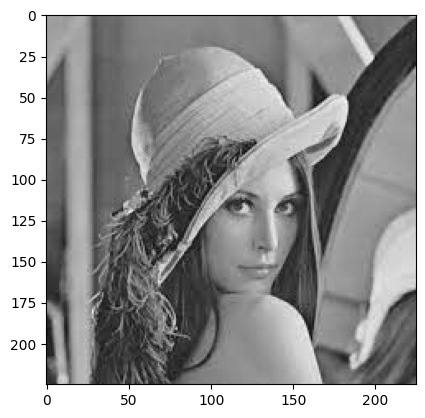

In [434]:
img3 = cv2.imread('Image3.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray')

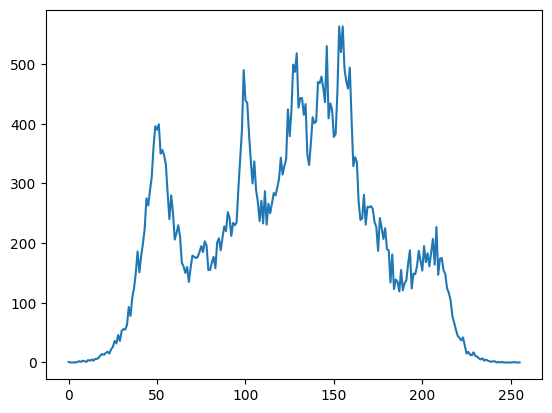

In [435]:
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])
plt.plot(hist3)

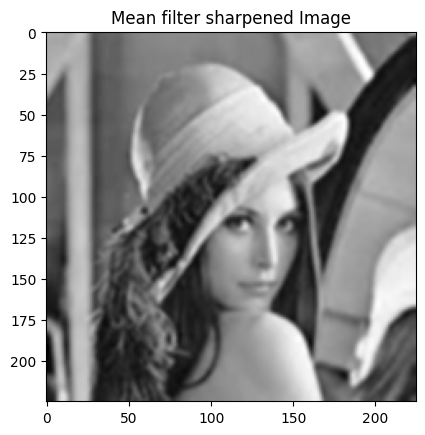

In [436]:
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

plt.title('Mean filter sharpened Image')
filtered_image = cv2.filter2D(img3, -1, kernel)
imgi = cv2.filter2D(filtered_image, -1, kernel)

plt.imshow(imgi, cmap='gray')

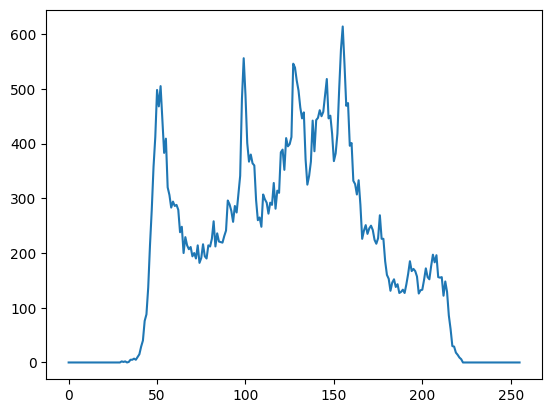

In [437]:
histi = cv2.calcHist([imgi], [0], None, [256], [0, 256])
plt.plot(histi)

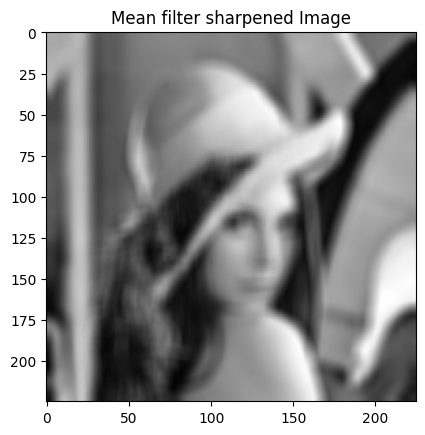

In [438]:
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

plt.title('Mean filter sharpened Image')
imgii = cv2.filter2D(img3, -1, kernel)

plt.imshow(imgii, cmap='gray')

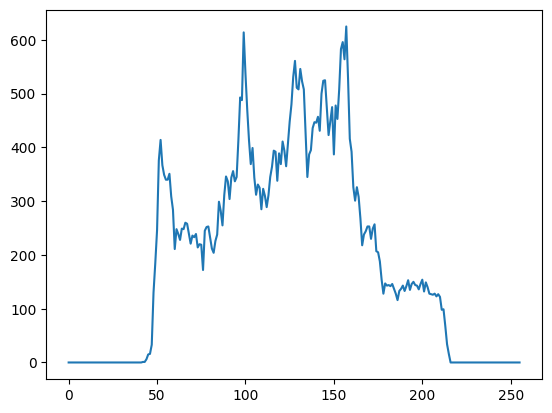

In [439]:
histii = cv2.calcHist([imgii], [0], None, [256], [0, 256])
plt.plot(histii)

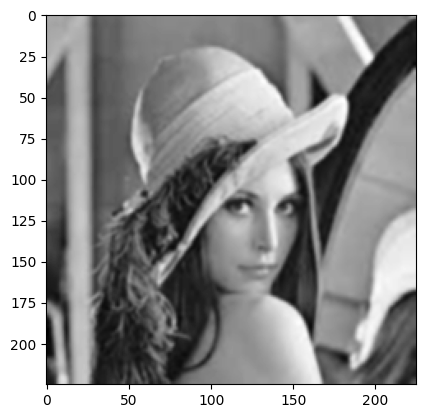

In [440]:
imgiii = cv2.GaussianBlur(img3, (5, 5), 1)
plt.imshow(imgiii, cmap='gray')

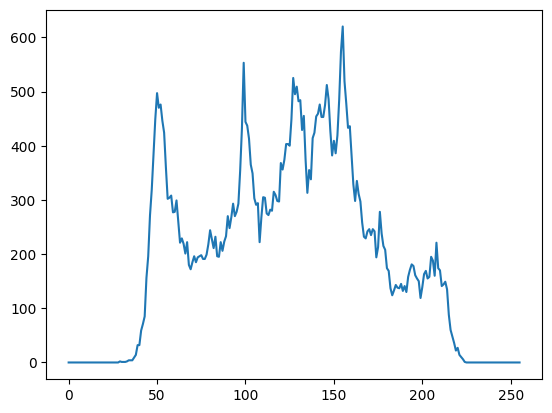

In [441]:
histiii = cv2.calcHist([imgiii], [0], None, [256], [0, 256])
plt.plot(histiii)

Text(0.5, 1.0, 'a 9*9 mean filter Histogram')

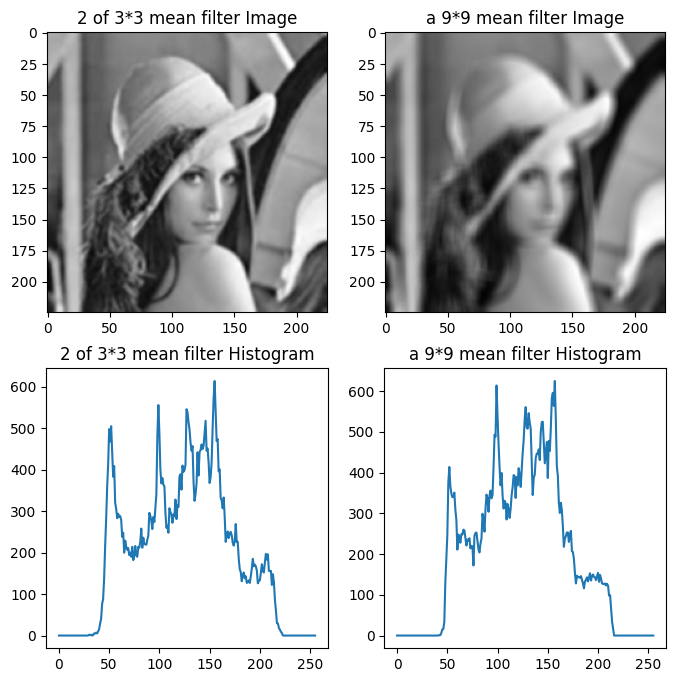

In [442]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(imgi, cmap='gray')
plt.title('2 of 3*3 mean filter Image')
plt.subplot(2, 2, 3)
plt.plot(histi)
plt.title('2 of 3*3 mean filter Histogram')
plt.subplot(2, 2, 2)
plt.imshow(imgii, cmap='gray')
plt.title('a 9*9 mean filter Image')
plt.subplot(2, 2, 4)
plt.plot(histii)
plt.title('a 9*9 mean filter Histogram')

Text(0.5, 1.0, 'a 5*5 gaussian filter Histogram')

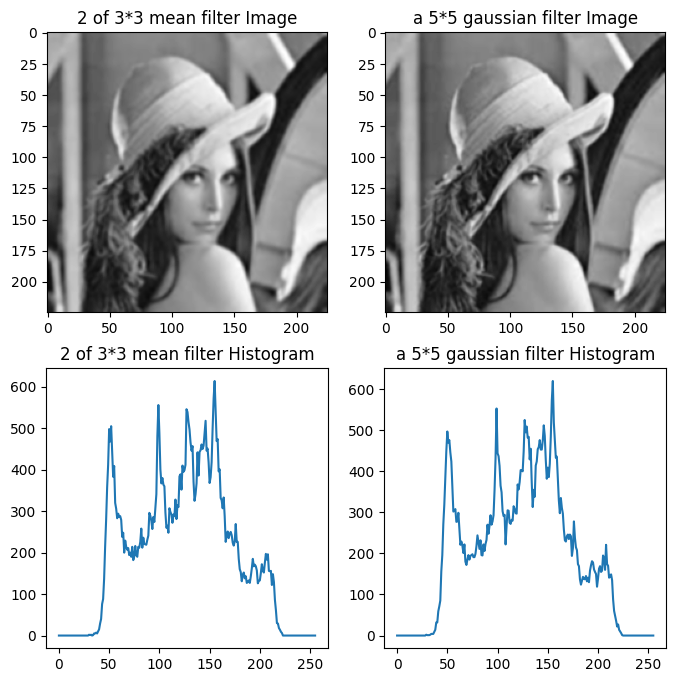

In [443]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(imgi, cmap='gray')
plt.title('2 of 3*3 mean filter Image')
plt.subplot(2, 2, 3)
plt.plot(histi)
plt.title('2 of 3*3 mean filter Histogram')
plt.subplot(2, 2, 2)
plt.imshow(imgiii, cmap='gray')
plt.title('a 5*5 gaussian filter Image')
plt.subplot(2, 2, 4)
plt.plot(histiii)
plt.title('a 5*5 gaussian filter Histogram')

Text(0.5, 1.0, 'a 5*5 gaussian filter Histogram')

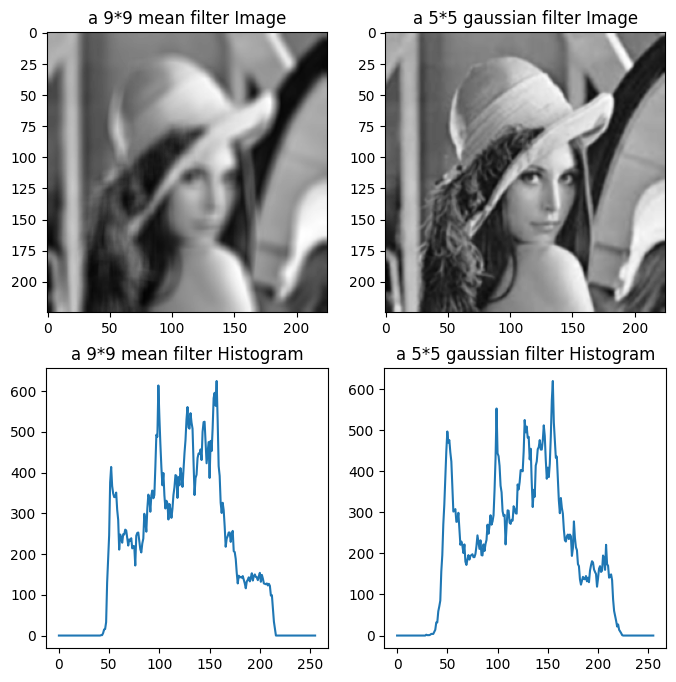

In [444]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(imgii, cmap='gray')
plt.title('a 9*9 mean filter Image')
plt.subplot(2, 2, 3)
plt.plot(histii)
plt.title('a 9*9 mean filter Histogram')
plt.subplot(2, 2, 2)
plt.imshow(imgiii, cmap='gray')
plt.title('a 5*5 gaussian filter Image')
plt.subplot(2, 2, 4)
plt.plot(histiii)
plt.title('a 5*5 gaussian filter Histogram')

None of them are similar to each other.

I think a 5\*5 filter with following values is simillar to two 3\*3 mean filters

In [479]:
kernel = np.array([[1, 2, 3, 2, 1],
                    [2, 4, 6, 4, 2],
                    [3, 6, 9, 6, 3],
                    [2, 4, 6, 4, 2],
                    [1, 2, 3, 2, 1]]) / 81

filtered_image = cv2.filter2D(img3, -1, kernel)


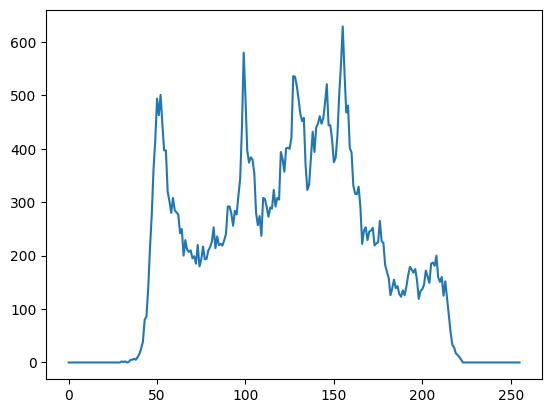

In [453]:
histc = cv2.calcHist([filtered_image], [0], None, [256], [0, 256])
plt.plot(histc)

Text(0.5, 1.0, 'custom filter Histogram')

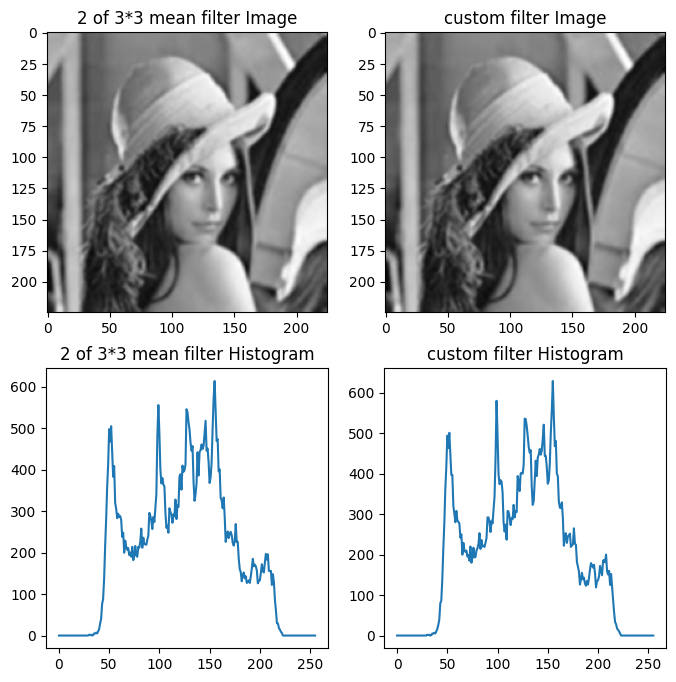

In [454]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(imgi, cmap='gray')
plt.title('2 of 3*3 mean filter Image')
plt.subplot(2, 2, 3)
plt.plot(histi)
plt.title('2 of 3*3 mean filter Histogram')
plt.subplot(2, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('custom filter Image')
plt.subplot(2, 2, 4)
plt.plot(histc)
plt.title('custom filter Histogram')

In [480]:
psnr_valueii = cv2.PSNR(imgi, imgii)
psnr_valueiii = cv2.PSNR(imgi, imgiii)
psnr_valuec = cv2.PSNR(imgi, filtered_image)
print(f'''I & II \t\t: {psnr_valueii}\n
I & III \t: {psnr_valueiii}\n
I & custom \t: {psnr_valuec}\n''')

I & II 		: 27.55295884627914

I & III 	: 41.2547169768515

I & custom 	: 59.58137386183622



# Q4

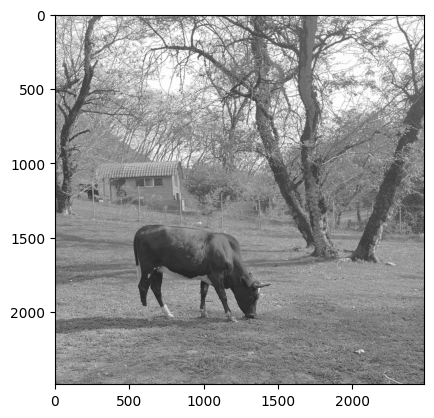

In [316]:
img4 = cv2.imread('Image4.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img4, cmap='gray')

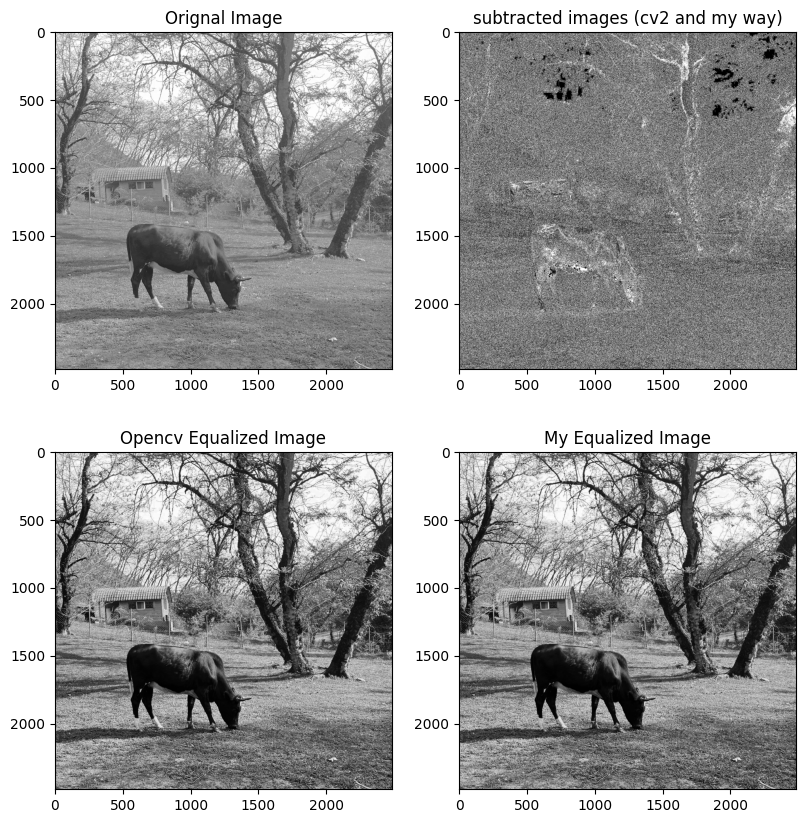

In [336]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equalized_hist = (cdf_normalized - cdf_normalized.min()) * 255 / (cdf_normalized.max() - cdf_normalized.min())
    equalized_image = np.interp(image.flatten(), bins[:-1], equalized_hist)
    equalized_image = equalized_image.reshape(image.shape)
    return equalized_image.astype(np.uint8)

equalized_image = histogram_equalization(img4)
cv_equalized_image = cv2.equalizeHist(img4)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(cv_equalized_image, cmap='gray')
plt.title('Opencv Equalized Image')
plt.subplot(1, 4, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('My Equalized Image')
plt.subplot(2, 4, 1)
plt.imshow(img4, cmap='gray')
plt.title('Orignal Image')
plt.subplot(2, 4, 2)
plt.imshow(cv_equalized_image - equalized_image, cmap='gray')
plt.title('subtracted images (cv2 and my way)')
plt.show()

Text(0.5, 1.0, 'My Equalized Image Histogram')

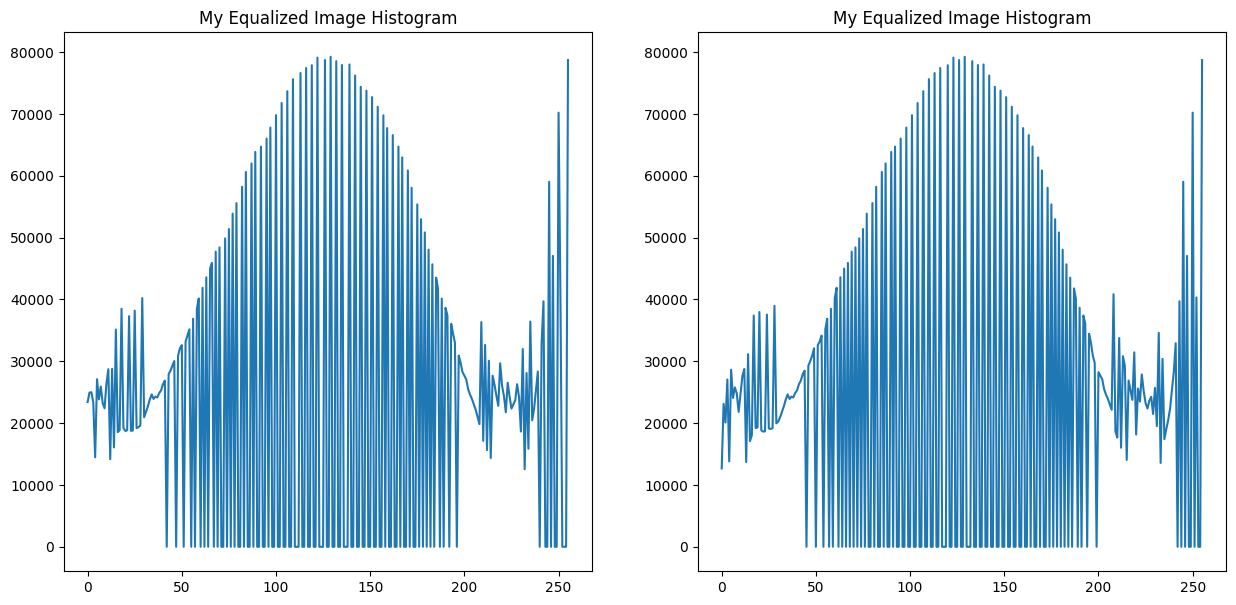

In [342]:
plt.figure(figsize=(15, 7))
hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('My Equalized Image Histogram')

hist = cv2.calcHist([cv_equalized_image], [0], None, [256], [0, 256])
plt.subplot(1, 2, 2)
plt.plot(hist)
plt.title('My Equalized Image Histogram')


Opencv considers neighbors and local area. So, it can do histogram equalization better and images equalized by opencv have better contrst.

# Q5

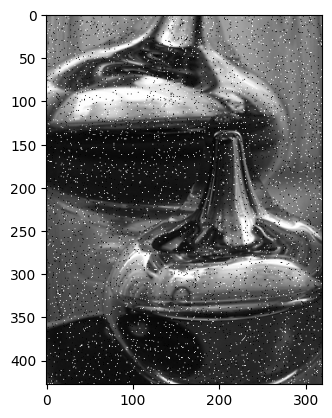

In [347]:
img5 = cv2.imread('Image5.jpg')
plt.imshow(img5)

The noise in this image is salt and peper noise. In this type of noise, some pixels are broken and their value are 0 or 255. 

To fix this noise, best filter is median filter so we will use it.

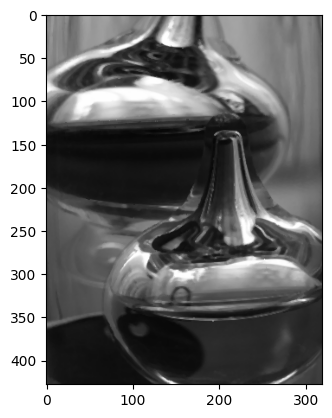

In [351]:
filtered_image = cv2.medianBlur(img5, 3)
plt.imshow(filtered_image)

# Q6

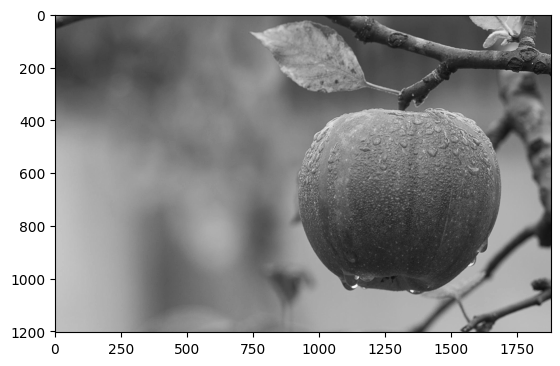

In [356]:
img6 = cv2.imread('Image6.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img6, cmap='gray')


Text(0.5, 1.0, 'Mean blured Image')

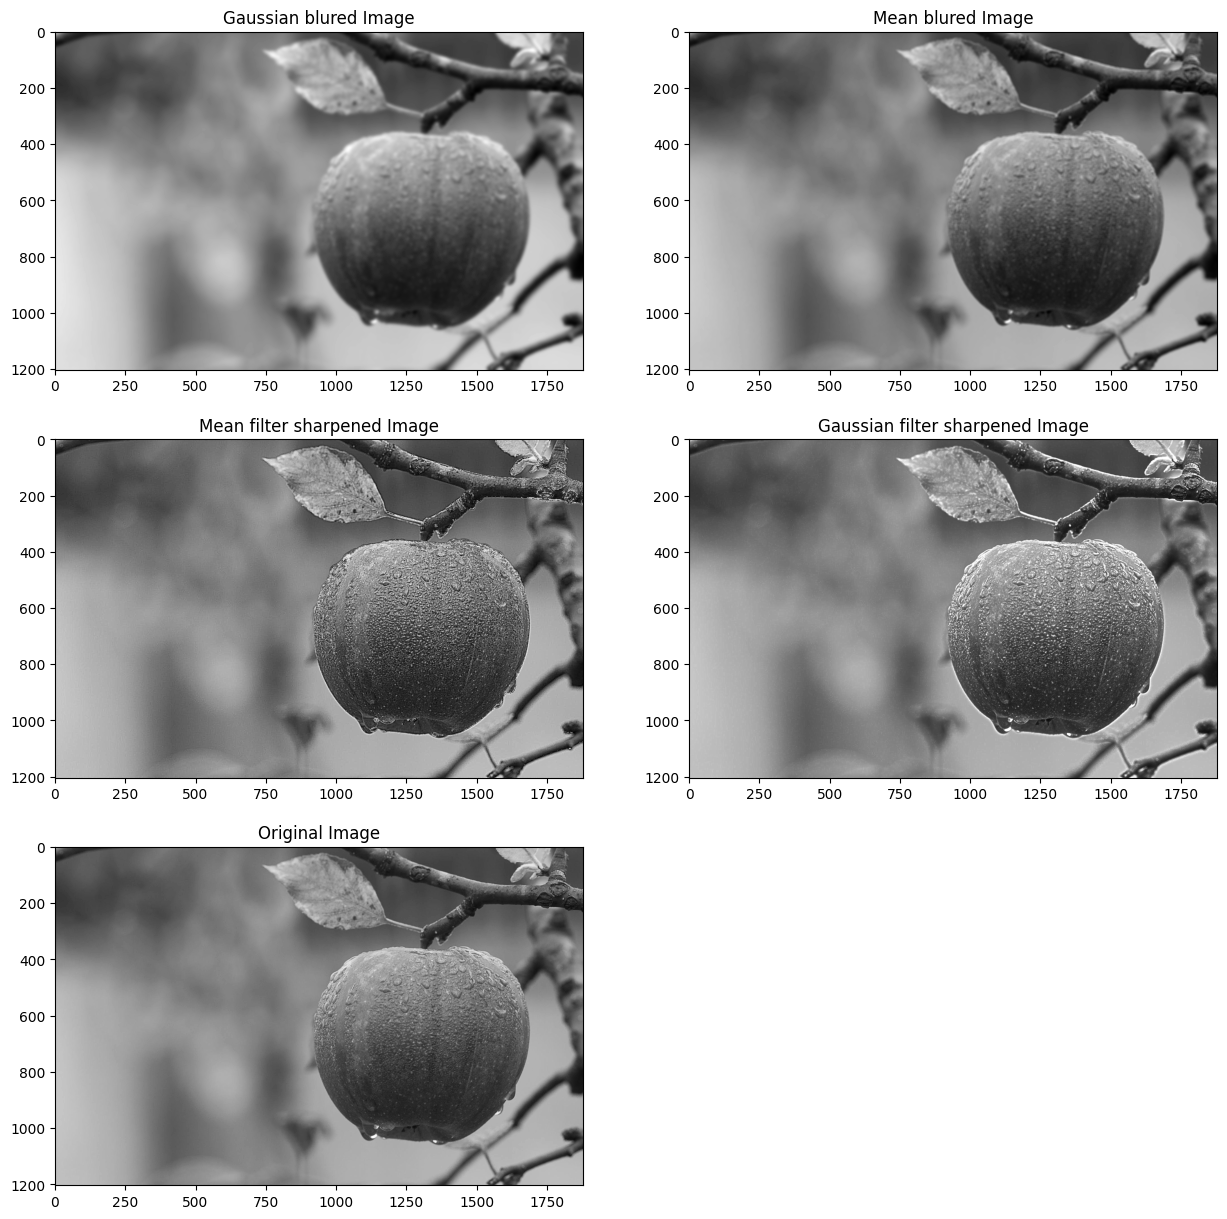

In [401]:
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 5)
plt.imshow(img6, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 2, 3)
plt.title('Mean filter sharpened Image')
filtered_image = cv2.filter2D(img6, -1, kernel)
plt.imshow(img6 + 1 * (img6 -filtered_image), cmap='gray')

plt.subplot(3, 2, 4)
blurred = cv2.GaussianBlur(img6, (0, 0), 5)
mask = cv2.subtract(img6, blurred)
sharpened = cv2.add(img6, 2 * mask)
plt.imshow(sharpened, cmap='gray')
plt.title('Gaussian filter sharpened Image')


plt.subplot(3, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian blured Image')

plt.subplot(3, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Mean blured Image')


In [410]:
cv2.imwrite('Q6_image_modified.png', img6 + 1 * (img6 -filtered_image)) 

True

# Q7

In [488]:
from PIL import Image

def read(path_to_file):
    with open(path_to_file, 'r') as file:
        lines = file.readlines()
    
    image_info = lines[0].strip().split()
    image_height = int(image_info[0])
    image_width = int(image_info[1])
    expected_stars = int(image_info[2])
    
    pixel_data = []
    for line in lines[1:]:
        rgb_values = line.strip()[1:-1].split(') (')
        for rgb in rgb_values:
            red, green, blue = map(int, rgb.split(', '))
            pixel_data.append((red, green, blue))
    
    return image_height, image_width, expected_stars, pixel_data
    

In [546]:
expected_stars

26

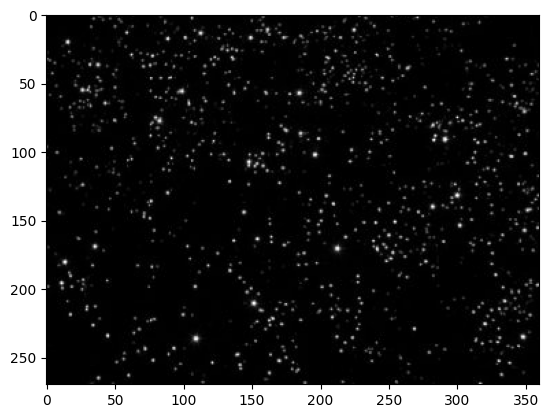

In [694]:
image_height, image_width, expected_stars, pixel_data = image_read('input.txt')

temp = Image.new('RGB', (image_width, image_height))
temp.putdata(pixel_data)
temp = np.array(temp)
temp = temp[:, :, ::-1].copy()
temp = cv2.cvtColor(temp, cv2. COLOR_BGR2GRAY)
plt.imshow(temp, cmap='gray')

plt.show()


In [734]:
(thresh, img7) = cv2.threshold(temp, temp.mean() * 2, 255, cv2.THRESH_BINARY)

filtered_image = cv2.medianBlur(img7, 7)
contours, _ = cv2.findContours(filtered_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Z_val = np.zeros((image_width, image_height))
centers = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        Z_val[cX, cY] = 255
        centers.append((cX, cY))
print(len(centers))
print(centers)

39
[(235, 244), (348, 234), (109, 236), (210, 216), (334, 213), (155, 215), (351, 196), (20, 196), (12, 180), (246, 173), (35, 168), (212, 170), (356, 154), (72, 147), (351, 131), (293, 133), (152, 107), (196, 102), (178, 89), (36, 83), (312, 80), (287, 86), (80, 78), (346, 67), (100, 59), (30, 58), (309, 52), (195, 55), (357, 39), (227, 45), (35, 35), (127, 28), (14, 20), (188, 18), (204, 11), (112, 13), (163, 12), (254, 1), (39, 2)]


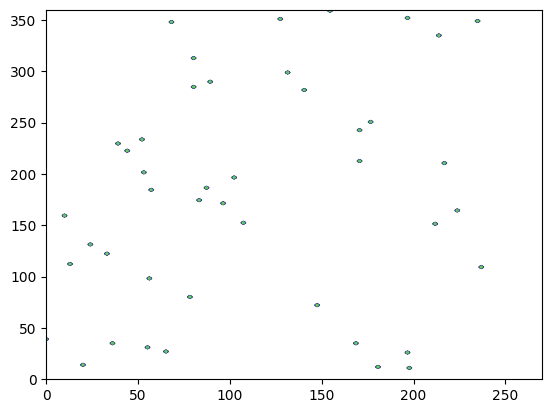

In [726]:
x = np.linspace(0,image_width, image_width)
y = np.linspace(0, image_height, image_height)
X, Y = np.meshgrid(y, x)

plt.contour(X, Y, Z_val)

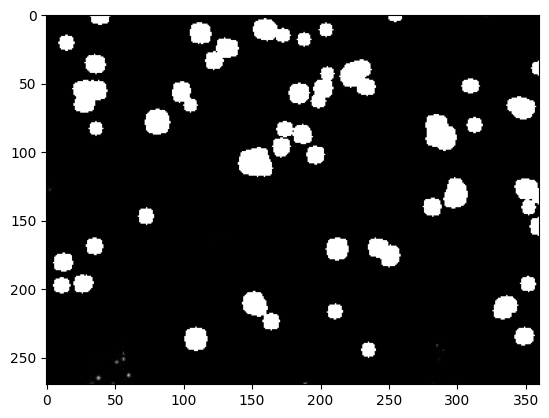

In [733]:
a = cv2.drawContours(temp , contours, -11, (255, 255, 255), 5)

plt.imshow(a, cmap='gray')